In [139]:
import pandas as pd
df = pd.read_csv("advertising/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# TV harcamalarına göre satış değerlendirmesi ve tahmini

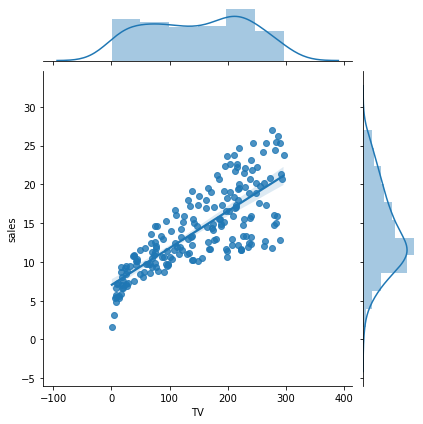

In [141]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [144]:
Y = df[["sales"]]
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [145]:
reg = LinearRegression()

In [146]:
model = reg.fit(X,Y)

In [147]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [148]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [149]:
model.intercept_

array([7.03259355])

In [150]:
model.coef_

array([[0.04753664]])

In [151]:
model.score(X,Y)

0.611875050850071

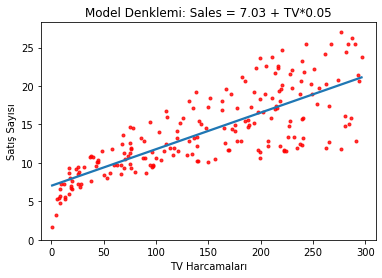

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [153]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [154]:
model.predict([[165]])

array([[14.87613922]])

In [155]:
model.predict([[400]])

array([[26.04724972]])

In [156]:
yeni_veri = [[5],[15],[30]]

In [157]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# artıklar

In [158]:
Y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [159]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [160]:
gercek_y = Y[0:10]

In [161]:
tahmin_edilen_y= pd.DataFrame(model.predict(X)[0:10])

In [162]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)

In [163]:
hatalar.columns =["gercek_y","tahmin_edilen_y"]

In [130]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,24.936289
1,10.4,14.785250
2,9.3,13.292128
3,18.5,20.637411
4,12.9,22.239919
5,7.2,12.827237
6,11.8,15.496260
7,13.2,18.925518
8,4.8,12.821768
9,10.6,23.279088


In [164]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [165]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [166]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [167]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105


# radio harcamalarına göre satış değerlendirmesi ve tahmini

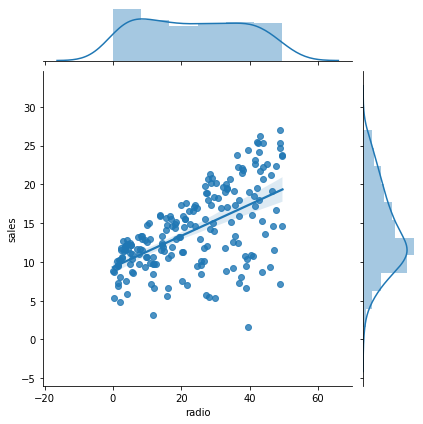

In [201]:
import seaborn as sns
sns.jointplot(x = "radio", y = "sales", data = df, kind ="reg")

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
x = df[["radio"]]
x.head()

,radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [204]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [205]:
reg = LinearRegression()

In [206]:
model = reg.fit(x,y)

In [207]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [209]:
model.intercept_

array([9.3116381])

In [210]:
model.coef_

array([[0.20249578]])

In [211]:
model.score(x,y)

0.33203245544529525

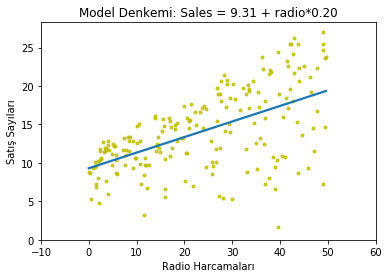

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["radio"], df["sales"], ci=None, scatter_kws={'color': 'y', 's':9})
g.set_title("Model Denkemi: Sales = 9.31 + radio*0.20")
g.set_xlabel("Radio Harcamaları")
g.set_ylabel("Satış Sayıları")
plt.xlim(-10,60)
plt.ylim(bottom=0);

Sales = 9.31 + 0.20*Radio

In [213]:
model.intercept_ + model.coef_*35

array([[16.39899051]])

In [214]:
model.predict([[35]])

array([[16.39899051]])

In [215]:
yeni_veri = ([[15],[30],[45]])
model.predict(yeni_veri)

array([[12.34907485],
       [15.3865116 ],
       [18.42394835]])

In [216]:
model.predict([[65]])

array([[22.47386402]])

# artıklar

In [217]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [218]:
model.predict(x)[0:10]

array([[16.96597871],
       [17.26972238],
       [18.60619455],
       [17.67471395],
       [11.49859256],
       [19.2136819 ],
       [15.95349979],
       [13.28055545],
       [ 9.73687924],
       [ 9.83812713]])

In [219]:
gercek_y = y[0:10]

In [220]:
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])

In [221]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)

In [222]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [223]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,16.965979
1,10.4,17.269722
2,9.3,18.606195
3,18.5,17.674714
4,12.9,11.498593
5,7.2,19.213682
6,11.8,15.953500
7,13.2,13.280555
8,4.8,9.736879
9,10.6,9.838127


In [224]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [225]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,16.965979,5.134021
1,10.4,17.269722,-6.869722
2,9.3,18.606195,-9.306195
3,18.5,17.674714,0.825286
4,12.9,11.498593,1.401407
5,7.2,19.213682,-12.013682
6,11.8,15.953500,-4.153500
7,13.2,13.280555,-0.080555
8,4.8,9.736879,-4.936879
9,10.6,9.838127,0.761873


In [226]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [227]:
import numpy as np
np.mean(hatalar["hata_kareler"])

34.93413866487738

# newspaper harcamalarına göre satış değerlendirmesi ve tahmini

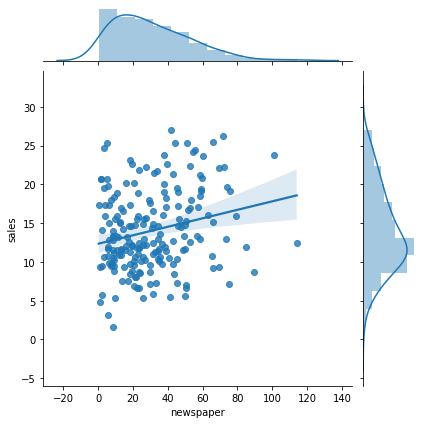

In [228]:
import seaborn as sns
sns.jointplot(x = "newspaper", y = "sales", data = df, kind = "reg")

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
x = df[["newspaper"]]
x.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [231]:
y  = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [232]:
reg = LinearRegression()

In [233]:
model  = reg.fit(x,y)

In [234]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
model.intercept_

array([12.35140707])

In [236]:
model.coef_

array([[0.0546931]])

In [237]:
model.score(x,y)

0.05212044544430516

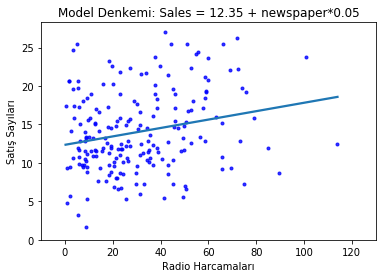

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["newspaper"], df["sales"], ci=None, scatter_kws={'color': 'b', 's':9})
g.set_title("Model Denkemi: Sales = 12.35 + newspaper*0.05")
g.set_xlabel("Radio Harcamaları")
g.set_ylabel("Satış Sayıları")
plt.xlim(-10,130)
plt.ylim(bottom=0);

Sales = 12.35 + 0.05*newspaper

In [239]:
model.intercept_ + model.coef_*60

array([[15.63299298]])

In [240]:
model.predict([[35]])

array([[14.26566552]])

In [241]:
yeni_veri = ([[25],[50],[75]])
model.predict(yeni_veri)

array([[13.71873453],
       [15.08606199],
       [16.45338945]])

In [242]:
model.predict([[155]])

array([[20.82883733]])

# artıklar

In [243]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [244]:
model.predict(x)[0:10]

array([[16.13616948],
       [14.81806581],
       [16.14163879],
       [15.55095333],
       [15.54548402],
       [16.45338945],
       [13.63669488],
       [12.98584701],
       [12.40610017],
       [13.51090076]])

In [245]:
gercek_y = y[0:10]

In [248]:
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])

In [249]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)

In [251]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,16.136169
1,10.4,14.818066
2,9.3,16.141639
3,18.5,15.550953
4,12.9,15.545484
5,7.2,16.453389
6,11.8,13.636695
7,13.2,12.985847
8,4.8,12.406100
9,10.6,13.510901


In [252]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,16.136169,5.963831
1,10.4,14.818066,-4.418066
2,9.3,16.141639,-6.841639
3,18.5,15.550953,2.949047
4,12.9,15.545484,-2.645484
5,7.2,16.453389,-9.253389
6,11.8,13.636695,-1.836695
7,13.2,12.985847,0.214153
8,4.8,12.406100,-7.606100
9,10.6,13.510901,-2.910901


In [259]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [260]:
import numpy as np
np.mean(hatalar["hata_kareler"])

27.29606922516092